In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_data = pd.read_csv('../Dataset/train.csv')
test_data = pd.read_csv('../Dataset/test.csv')

In [19]:
train_data.head()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1
3,4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.08327777900000001,0.0,0.0,0.0,0
4,5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317445504,0.0,0.0,0.0,0


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                48108 non-null  int64  
 1   age                                               43270 non-null  float64
 2   number_dependent_family_members                   45320 non-null  float64
 3   monthly_income                                    43994 non-null  float64
 4   number_of_credit_lines                            43990 non-null  float64
 5   real_estate_loans                                 45649 non-null  float64
 6   ratio_debt_payment_to_income                      44344 non-null  float64
 7   credit_line_utilization                           43798 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    45296 non-null  float64
 9   number_of_previou

credit_line_utilization columns seems to be a float, but it is an object

In [22]:
train_data['credit_line_utilization'] = train_data['credit_line_utilization'].str.replace(',','').astype(float)
test_data['credit_line_utilization'] = test_data['credit_line_utilization'].str.replace(',','').astype(float)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  float64
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

We will not need ID columns for further modeling. Thus, we will drop it

In [24]:
train_data.drop(labels='Id', axis=1, inplace=True)

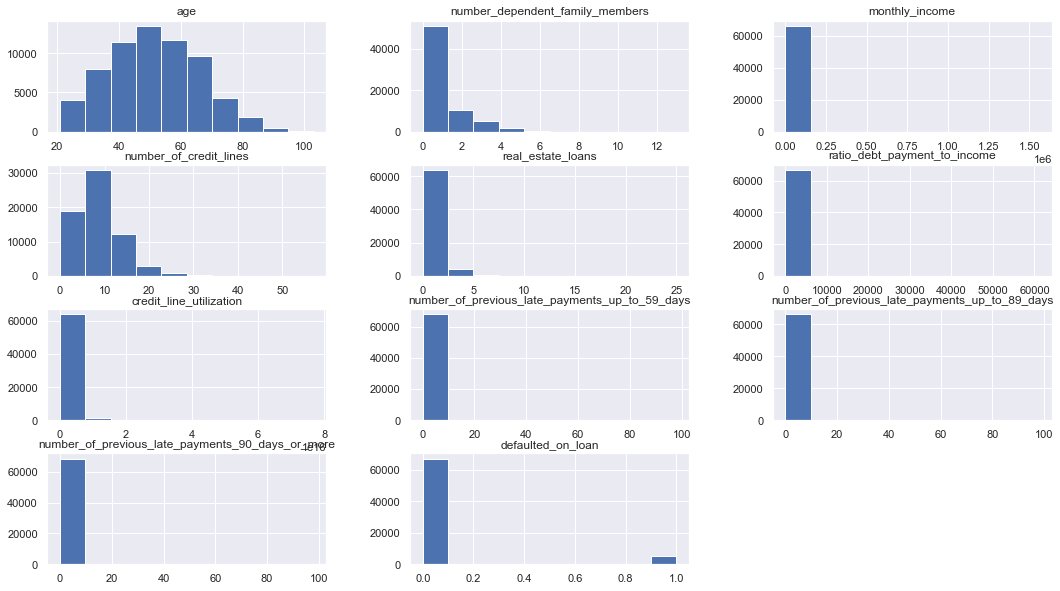

In [25]:
train_data.hist(train_data.columns.values.tolist(), figsize=(18,10))
plt.show()

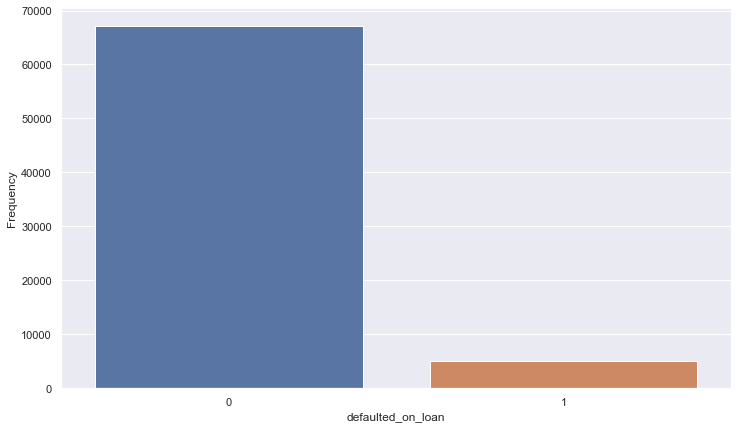

In [27]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'defaulted_on_loan', data = train_data)
plt.ylabel('Frequency')
plt.show()

As we can see the target value is very imbalanced.

In [28]:
train_data.corr()

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
age,1.000000,-0.206523,0.047781,0.187789,0.065339,-0.002943,0.003866,-0.049908,-0.046765,-0.049572,-0.104907
number_dependent_family_members,-0.206523,1.000000,0.081789,0.039741,0.119351,0.013291,-0.001366,0.002673,-0.004214,-0.003907,0.047568
monthly_income,0.047781,0.081789,1.000000,0.112294,0.166342,-0.038272,0.003453,-0.013266,-0.014548,-0.016371,-0.025232
number_of_credit_lines,0.187789,0.039741,0.112294,1.000000,0.425700,0.006531,0.003703,-0.045915,-0.064187,-0.072163,-0.024021
real_estate_loans,0.065339,0.119351,0.166342,0.425700,1.000000,0.023599,0.001309,-0.027993,-0.038241,-0.043079,-0.006268
ratio_debt_payment_to_income,-0.002943,0.013291,-0.038272,0.006531,0.023599,1.000000,0.000761,-0.002239,-0.002307,-0.003211,-0.004037
credit_line_utilization,0.003866,-0.001366,0.003453,0.003703,0.001309,0.000761,1.000000,0.005439,0.006862,0.007014,0.003578
number_of_previous_late_payments_up_to_59_days,-0.049908,0.002673,-0.013266,-0.045915,-0.027993,-0.002239,0.005439,1.000000,0.982722,0.977169,0.124243
number_of_previous_late_payments_up_to_89_days,-0.046765,-0.004214,-0.014548,-0.064187,-0.038241,-0.002307,0.006862,0.982722,1.000000,0.990206,0.100133
number_of_previous_late_payments_90_days_or_more,-0.049572,-0.003907,-0.016371,-0.072163,-0.043079,-0.003211,0.007014,0.977169,0.990206,1.000000,0.113465


<AxesSubplot:>

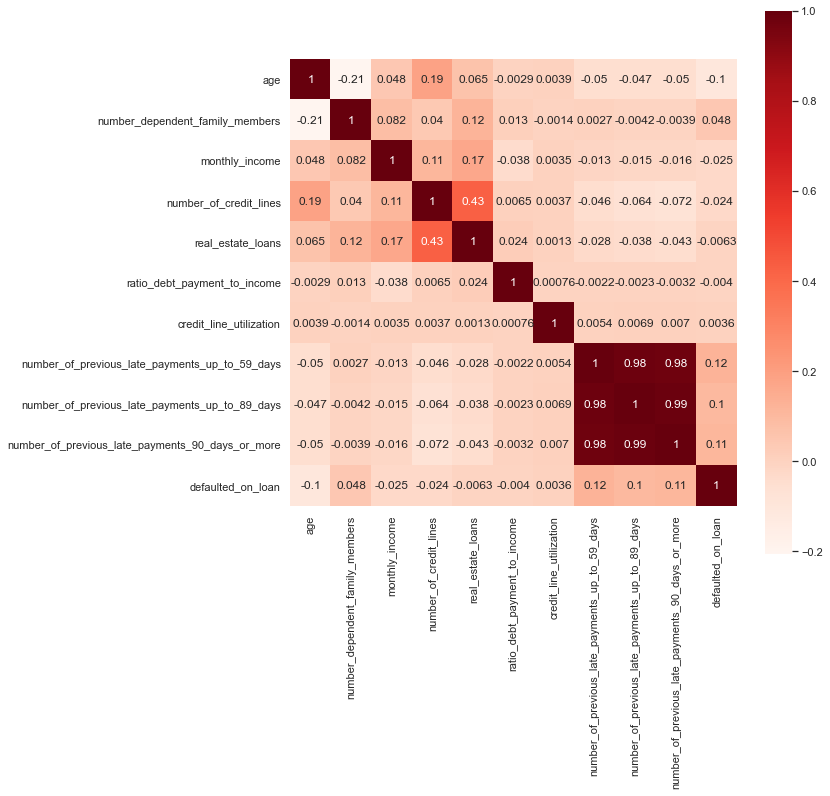

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(),cmap="Reds",square=True,annot=True)

Missing values

In [31]:
loan_true = train_data[train_data["defaulted_on_loan"] == 1]
loan_false = train_data[train_data["defaulted_on_loan"] == 0]
pd.DataFrame({
  "n_missing_target_0": loan_false.isna().sum().sort_values(ascending = False),
  "n_missing_target_1": loan_true.isna().sum().sort_values(ascending = False)
})

,n_missing_target_0,n_missing_target_1
age,6631,513
credit_line_utilization,5893,453
number_of_credit_lines,5703,451
monthly_income,5572,444
number_of_previous_late_payments_up_to_89_days,5402,443
ratio_debt_payment_to_income,5202,406
number_dependent_family_members,3906,310
number_of_previous_late_payments_up_to_59_days,3894,301
real_estate_loans,3530,276
number_of_previous_late_payments_90_days_or_more,3378,243


The conclusion from our EDA is that there are a lot of missing values in our dataset with respect to our target feature. We can also see the same scenario in our test data as well with the values that are not distributed well.